In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

print("GPU Available:", tf.test.is_gpu_available())
print("GPU Details:", tf.config.experimental.list_physical_devices('GPU'))

GPU Available: True
GPU Details: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1732658430.594628    1486 gpu_device.cc:2022] Created device /device:GPU:0 with 4047 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:26:00.0, compute capability: 7.5


Malignant, Tumor:


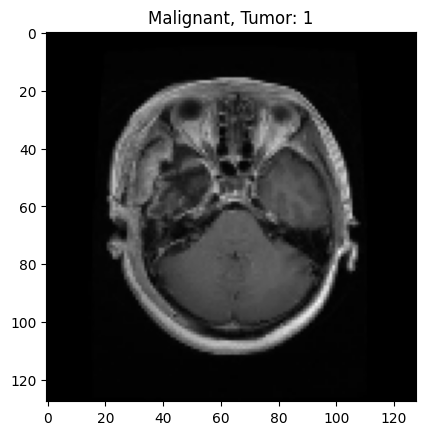

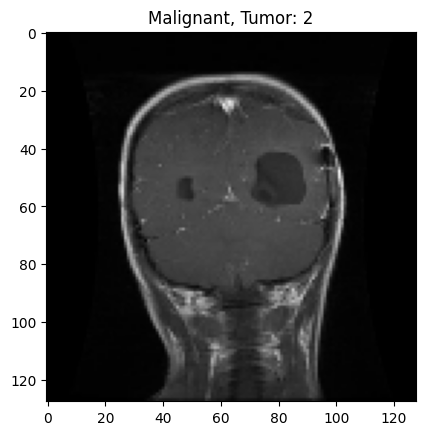

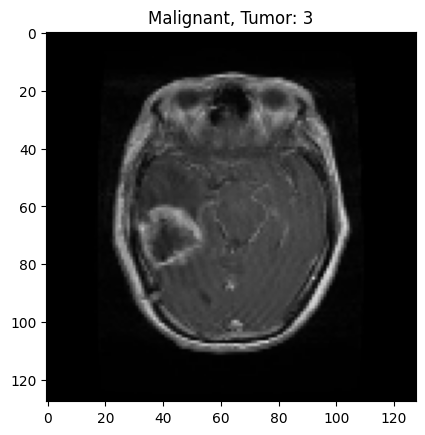

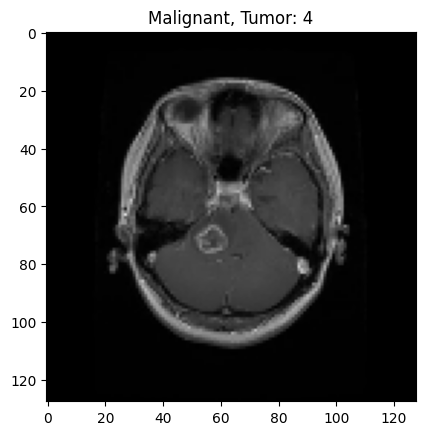

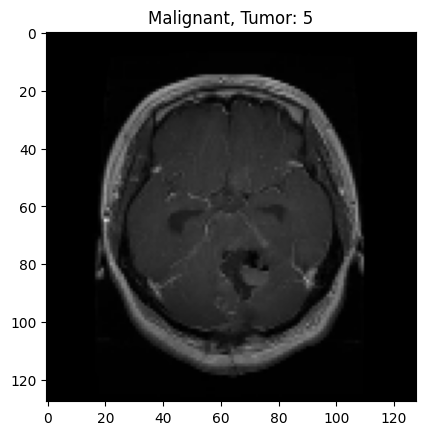

In [9]:

print("Malignant, Tumor:")
glioma_folder ="Training/glioma"
x=0

for img_name in os.listdir(glioma_folder):
    img_path = os.path.join(glioma_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Malignant, Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

No tumor:


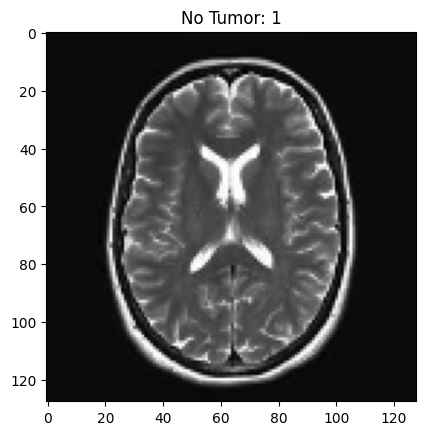

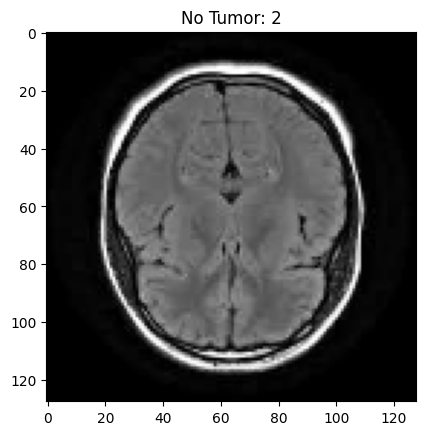

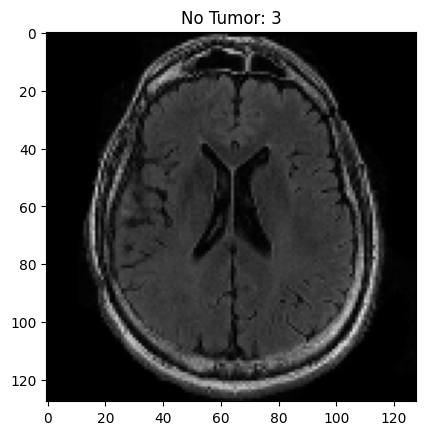

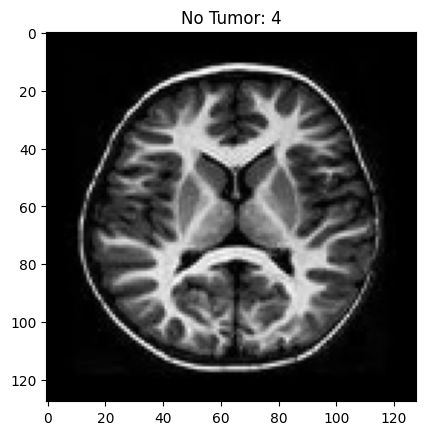

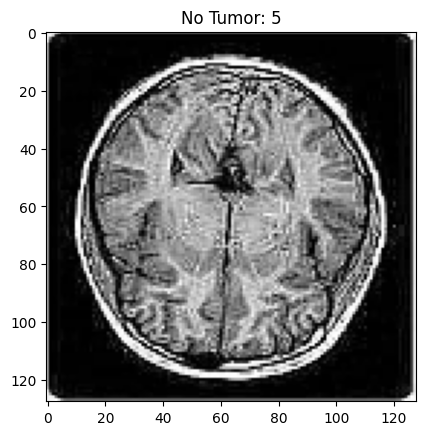

In [10]:
print("No tumor:")
notumor_folder="Training/notumor"
x=0

for img_name in os.listdir(notumor_folder):
    img_path = os.path.join(notumor_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("No Tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

Beningn:


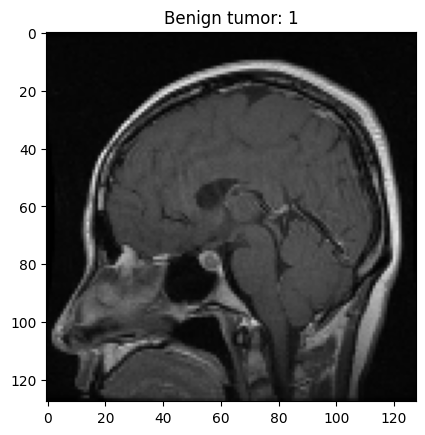

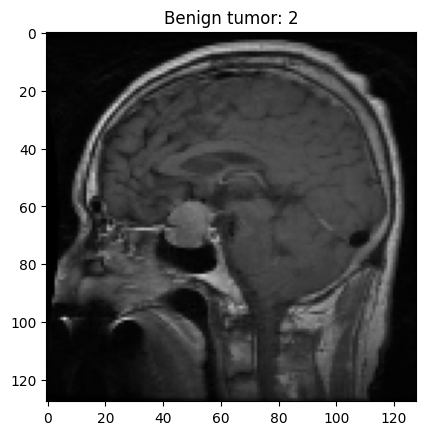

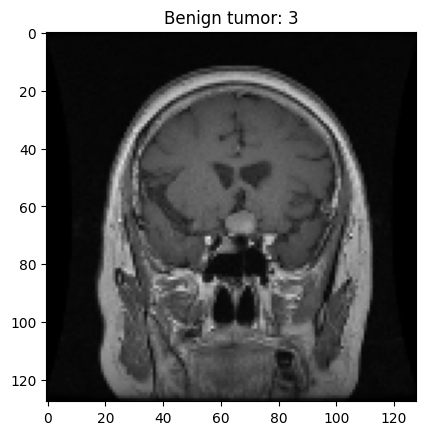

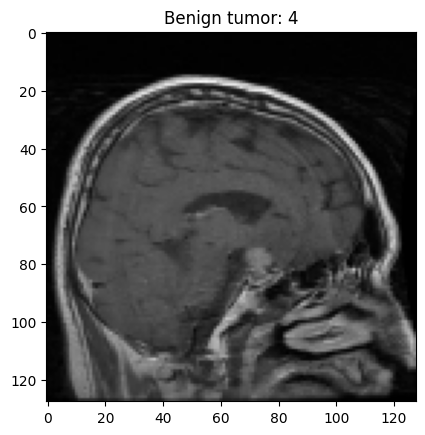

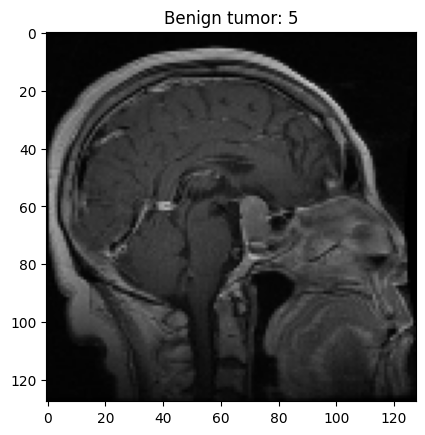

In [11]:
print("Beningn:")
benign_folder="Training/pituitary"
x=0

for img_name in os.listdir(benign_folder):
    img_path = os.path.join(benign_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title("Benign tumor: " + str(x+1))
    plt.show()
    x+=1
    if(x>=5):
        break

In [12]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}


categories = {
    "Tumor": ["Glioma", "Pituitary", "Meningioma"],
    "No Tumor": ["No Tumor"],
    "Benign": ["Pituitary"],
    "Malignant": ["Glioma", "Meningioma"]
}


category_counts = {cat: 0 for cat in categories}

for category, included_folders in categories.items():
    for folder in included_folders:
        folder_path = original_folders[folder]
        category_counts[category] += len(os.listdir(folder_path))

print("Number of images in each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")


image_formats = Counter()
image_sizes = Counter()

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        img = cv2.imread(img_path)

        if img is None:
            continue

        image_formats[img_name.split('.')[-1].lower()] += 1
        image_sizes[img.shape[:2]] += 1

print("\nImage formats:")
for fmt, count in image_formats.items():
    print(f"{fmt}: {count}")

print("\nImage sizes:")
for size, count in image_sizes.items():
    print(f"{size}: {count} images")

print("\nPotential Class Imbalance:")
max_class = max(category_counts, key=category_counts.get)
min_class = min(category_counts, key=category_counts.get)
print(f"Most images: {max_class} ({category_counts[max_class]} images)")
print(f"Fewest images: {min_class} ({category_counts[min_class]} images)")
imbalance_ratio = category_counts[max_class] / category_counts[min_class]
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")


Number of images in each category:
Tumor: 4117
No Tumor: 1595
Benign: 1457
Malignant: 2660

Image formats:
jpg: 5712

Image sizes:
(512, 512): 3955 images
(225, 225): 268 images
(417, 428): 33 images
(197, 177): 7 images
(259, 194): 10 images
(630, 630): 77 images
(257, 236): 3 images
(236, 236): 53 images
(210, 233): 2 images
(198, 150): 36 images
(680, 680): 13 images
(277, 235): 1 images
(519, 600): 1 images
(442, 442): 37 images
(282, 230): 15 images
(213, 236): 17 images
(454, 442): 13 images
(214, 235): 14 images
(264, 210): 1 images
(221, 228): 38 images
(236, 214): 20 images
(592, 562): 2 images
(280, 420): 13 images
(400, 393): 14 images
(540, 504): 18 images
(222, 227): 22 images
(243, 207): 14 images
(222, 212): 2 images
(252, 200): 32 images
(530, 380): 7 images
(244, 206): 28 images
(300, 227): 2 images
(242, 208): 18 images
(168, 300): 38 images
(251, 201): 43 images
(234, 215): 22 images
(225, 207): 2 images
(1024, 1024): 5 images
(832, 825): 2 images
(600, 600): 1 image

In [13]:
original_folders = {
    "Glioma": "Training/glioma",
    "No Tumor": "Training/notumor",
    "Pituitary": "Training/pituitary",
    "Meningioma": "Training/meningioma"
}

resize_dim = (128, 128)

resized_normalized_images = []

for folder, path in original_folders.items():
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        img_resized = cv2.resize(img, resize_dim)
        img_normalized = img_resized / 255.0
        resized_normalized_images.append(img_normalized)

print(f"Processed {len(resized_normalized_images)} images (resized and normalized).")


Processed 5712 images (resized and normalized).


In [31]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Path to the Training folder
train_path = 'Training'  # Assuming all images are in the 'Training' folder, with subfolders
test_path = "Testing"
# Create lists to store images and labels

# Dictionary to map subfolder names to labels (Tumor or No Tumor)
folder_labels = {
    "glioma": 1,
    "pituitary": 1,
    "meningioma": 1, 
    "notumor": 0 
}

def folders_to_labels(path):
    images = []
    labels = []
    for subfolder_name in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder_name)

        if os.path.isdir(subfolder_path):
            label_value = folder_labels.get(subfolder_name.lower())
            
            for img_name in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, img_name)

                if img_name.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        img_resized = cv2.resize(img, (128, 128)) 
                        img_normalized = img_resized / 255.0 

                        images.append(img_normalized)
                        labels.append(label_value)

    return np.array(images), np.array(labels)

train_x,train_y = folders_to_labels(train_path)
test_x, test_y = folders_to_labels(test_path)

print(f"Shape of x_data: {train_x.shape}")
print(f"Shape of y_data: {train_y.shape}")

model_binary = Sequential([
    Conv2D(4, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((8, 8)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model_binary.summary()


first_hist = model_binary.fit(train_x, train_y, epochs=10, validation_data=(test_x,test_y))

model_binary.evaluate(test_x, test_y, verbose=2)

Shape of x_data: (5712, 128, 128)
Shape of y_data: (5712,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 4)    │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │        28,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,905 (112.91 KB)

 Trainable params: 28,905 (112.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8085 - loss: 0.4611 - val_accuracy: 0.8780 - val_loss: 0.2736
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9424 - loss: 0.1732 - val_accuracy: 0.9115 - val_loss: 0.2348
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9490 - loss: 0.1429 - val_accuracy: 0.9146 - val_loss: 0.2209
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.1236 - val_accuracy: 0.9230 - val_loss: 0.2047
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9592 - loss: 0.1155 - val_accuracy: 0.9222 - val_loss: 0.1860
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9689 - loss: 0.0969 - val_accuracy: 0.9283 - val_loss: 0.1816
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.0950 - val_accuracy: 0.9283 - val_loss: 0.1793
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9725 - loss: 0.0841 - val_accuracy: 0

[0.1331823170185089, 0.942791759967804]

In [15]:
# Part 5 of Task 2
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import keras
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

img_width, img_height = 128, 128
batch_size = 32

main_dir = 'Training'


In [16]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    main_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [17]:
model = Sequential()

model.add(Input(shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# output layer
model.add(Dense(3, activation='softmax'))  # 3 classes: giloma, meningioma, notumor, pituitary


In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,091 (12.64 MB)

 Trainable params: 3,313,091 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
epochs = 10
second_hist = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 4), output.shape=(None, 3)

{'accuracy': [0.9895554780960083, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [0.03421800583600998, 0.00017202777962666005, 8.544747106498107e-05, 4.945710679749027e-05, 3.177699545631185e-05, 2.1891328287892975e-05, 1.583935591042973e-05, 1.1914259630430024e-05, 9.229577699443325e-06, 7.317910331039457e-06], 'val_accuracy': [0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414, 0.6910755038261414], 'val_loss': [3.9884681701660156, 4.38777494430542, 4.699615478515625, 4.948689937591553, 5.160410404205322, 5.340780258178711, 5.5007710456848145, 5.642219543457031, 5.771934509277344, 5.8899149894714355]}


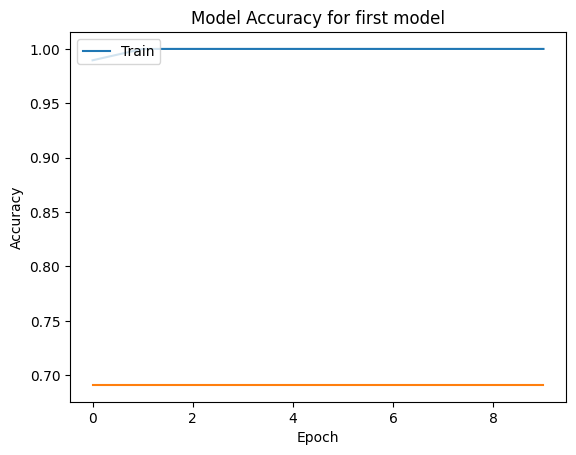

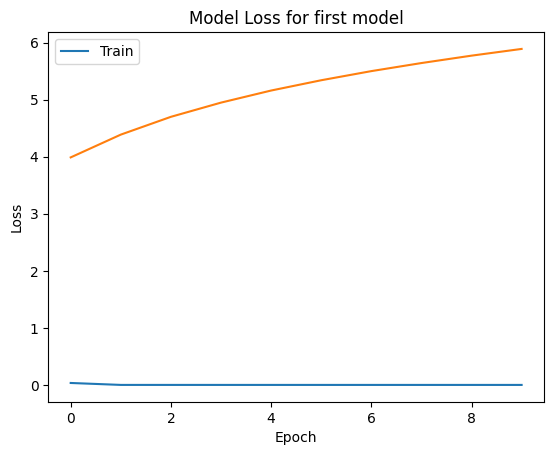

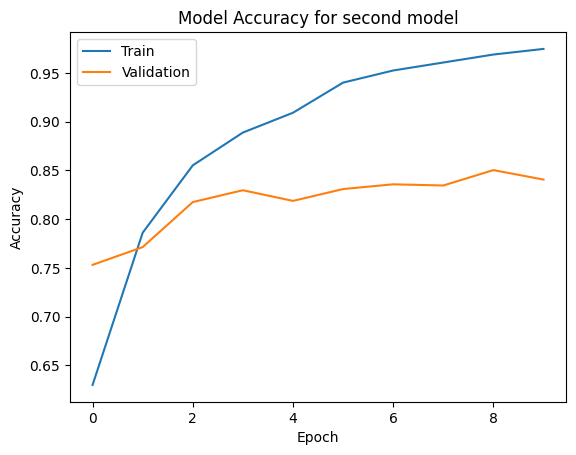

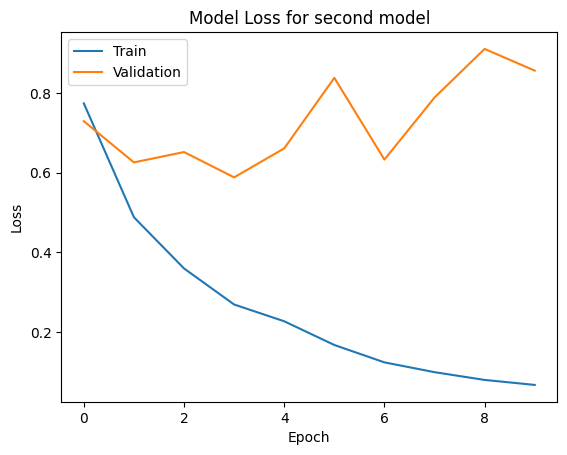

In [ ]:
# Task 4
# Plot training, validation accuracy and loss for each epochs (model_eval and history vars)
print(first_hist.history)
# ToDo: dorób val accuracy
# Plot training & validation loss values for first model
plt.plot(first_hist.history['accuracy'])
plt.plot(first_hist.history['val_accuracy'])
plt.title('Model Accuracy for first model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(first_hist.history['loss'])
plt.plot(first_hist.history['val_loss'])
plt.title('Model Loss for first model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


# Plot training & validation loss values for second model
plt.plot(second_hist.history['accuracy'])
plt.plot(second_hist.history['val_accuracy'])
plt.title('Model Accuracy for second model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(second_hist.history['loss'])
plt.plot(second_hist.history['val_loss'])
plt.title('Model Loss for second model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate both models on the test set (report accuracy, precision, recall, f1-score)

test_dir = 'Training'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

model.evaluate(test_generator, verbose=2)

# report accuracy, precision, recall, f1-score
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


# plot confusion matrix for both models
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Found 5712 images belonging to 4 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 4), output.shape=(None, 3)

In [ ]:
# retrain models with applied improvement

# first model with applied improvement

first_impr_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

first_impr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
first_impr_hist = first_impr_model.fit(x_data, y_data, epochs=10, batch_size=32)
first_impr_model.evaluate(x_data, y_data, verbose=2)

# second model with applied improvement

second_impr_model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

second_impr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
second_impr_hist = second_impr_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

/home/djk/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'x_data' is not defined

In [ ]:
# compare the performace of improved models with the original models using same metrics

# Plot training & validation loss values for first model with and without applied improvement
plt.plot(first_hist.history['accuracy'])
plt.plot(first_impr_hist.history['accuracy'])
plt.title('Model Accuracy for first model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original', 'Improved'], loc='upper left')
plt.show()

plt.plot(first_hist.history['loss'])
plt.plot(first_impr_hist.history['loss'])
plt.title('Model Loss for first model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Original', 'Improved'], loc='upper left')
plt.show()

# Plot training & validation loss values for second model with and without applied improvement
plt.plot(second_hist.history['accuracy'])
plt.plot(second_hist.history['val_accuracy'])
plt.plot(second_impr_hist.history['accuracy'])
plt.plot(second_impr_hist.history['val_accuracy'])
plt.title('Model Accuracy for second model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Validation', 'Improved Train', 'Improved Validation'], loc='upper left')
plt.show()

plt.plot(second_hist.history['loss'])
plt.plot(second_hist.history['val_loss'])
plt.plot(second_impr_hist.history['loss'])
plt.plot(second_impr_hist.history['val_loss'])
plt.title('Model Loss for second model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Original Train', 'Original Validation', 'Improved Train', 'Improved Validation'], loc='upper left')
plt.show()

In [ ]:
# Perform k-fold cross validation on the improved models and evaluate the model's accuracy, precision, recall, f1 score across the different folds

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# k-fold cross validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# improved first model
first_impr_accuracy = []
first_impr_precision = []
first_impr_recall = []
first_impr_f1 = []

for train_index, test_index in kf.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    first_impr_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

    first_impr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    first_impr_model.fit(x_train, y_train, epochs=10, batch_size=32)
    first_impr_predictions = first_impr_model.predict(x_test)
    first_impr_y_pred = np.argmax(first_impr_predictions, axis=1)
    first_impr_y_true = y_test
    first_impr_accuracy.append(accuracy_score(first_impr_y_true, first_impr_y_pred))
    first_impr_precision.append(precision_score(first_impr_y_true, first_impr_y_pred, average='macro'))
    first_impr_recall.append(recall_score(first_impr_y_true, first_impr_y_pred, average='macro'))
    first_impr_f1.append(f1_score(first_impr_y_true, first_impr_y_pred, average='macro'))
    
print(f'First improved model accuracy: {first_impr_accuracy}')
print(f'First improved model precision: {first_impr_precision}')
print(f'First improved model recall: {first_impr_recall}')
print(f'First improved model f1: {first_impr_f1}')

# improved second model
second_impr_accuracy = []
second_impr_precision = []
second_impr_recall = []
second_impr_f1 = []

for train_index, test_index in kf.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    second_impr_model = Sequential([
        Input(shape=(img_width, img_height, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])

    second_impr_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=4)
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=4)
    
    second_impr_model.fit(x_train, y_train_one_hot, epochs=epochs)
    second_impr_predictions = second_impr_model.predict(x_test)
    second_impr_y_pred = np.argmax(second_impr_predictions, axis=1)
    second_impr_y_true = y_test
    second_impr_accuracy.append(accuracy_score(second_impr_y_true, second_impr_y_pred))
    second_impr_precision.append(precision_score(second_impr_y_true, second_impr_y_pred, average='macro'))
    second_impr_recall.append(recall_score(second_impr_y_true, second_impr_y_pred, average='macro'))
    second_impr_f1.append(f1_score(second_impr_y_true, second_impr_y_pred, average='macro'))
    
print(f'Second improved model accuracy: {second_impr_accuracy}')
print(f'Second improved model precision: {second_impr_precision}')
print(f'Second improved model recall: {second_impr_recall}')
print(f'Second improved model f1: {second_impr_f1}')

In [40]:
# ToDo Step 6
data_path = "./newDataset/Testing"

test_x_new, test_y_new = folders_to_labels(data_path)
model_binary_test = model_binary.evaluate(test_x_new, test_y_new, verbose=2)



13/13 - 0s - 4ms/step - accuracy: 0.6599 - loss: 0.8435
